# 1. Examine and preparing the data for Analysis
We will discover the data and prepare for the analysing.


In [43]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read file into DataFrame
ri = pd.read_csv('/Users/ledat/Desktop/police.csv')

In [3]:
# check the head of Data
ri.head()

state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       False      0-15 Min               False  Zone X4  
1       Citation       False      0-15 Min               False  Zone K3  
2       Citation       False      0-15 Min               False  Zone X4  
3  Arrest Driver        True     16-30 Min               False  Zone X1  
4       Citation       False      0-15 Min               False  Zone X3

In [4]:
# check number of missing values in columns
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [5]:
# check the shape of the data
ri.shape

(91741, 15)

In [6]:
# check the number of missing values in columns
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

**Note:** 'county_name' only contains missing values and all value in 'state' is the same (Rhode Island). So we will drop these 2 columns.

In [7]:
# drop columns 'county_name' and 'state'
ri.drop(['county_name','state'], axis=1, inplace=True)

**Note**: 'driver_gender' will be very important to analyses. So we have to drop all missing values in this columns.

In [8]:
# drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

In [9]:
# check the number of missing values again
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

Now we can see there is only missing values in column 'search_type'

In [10]:
ri.shape

(86536, 13)

In [11]:
# check the data types of values in each columns
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

We need to change data types of 'is_arrested' to bool 

In [12]:
# change data type of 'is_arrested' to 'bool'
ri.is_arrested = ri.is_arrested.astype('bool')

**Note:** We need to combine 'stop_date' and 'stop_time' to a single column, then convert it to datetime format.

In [13]:
# concatenate 'stop_date' and 'stop_time'
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

In [14]:
# convert new column 'stop_datetime' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

In [15]:
# set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

In [16]:
ri.head()

stop_date stop_time driver_gender driver_race  \
stop_datetime                                                         
2005-01-04 12:55:00  2005-01-04     12:55             M       White   
2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2005-02-17 04:15:00  2005-02-17     04:15             M       White   
2005-02-20 17:15:00  2005-02-20     17:15             M       White   
2005-02-24 01:20:00  2005-02-24     01:20             F       White   

                                      violation_raw  violation  \
stop_datetime                                                    
2005-01-04 12:55:00  Equipment/Inspection Violation  Equipment   
2005-01-23 23:15:00                        Speeding   Speeding   
2005-02-17 04:15:00                        Speeding   Speeding   
2005-02-20 17:15:00                Call for Service      Other   
2005-02-24 01:20:00                        Speeding   Speeding   

                     search_conducted search_type   stop_outcome  is_arrested  \
stop_datetime                                                                   
2005-01-04 12:55:00             False         NaN       Citation        False   
2005-01-23 23:15:00             False         NaN       Citation        False   
2005-02-17 04:15:00             False         NaN       Citation        False   
2005-02-20 17:15:00             False         NaN  Arrest Driver         True   
2005-02-24 01:20:00             False         NaN       Citation        False   

                    stop_duration  drugs_related_stop district  
stop_datetime                                                   
2005-01-04 12:55:00      0-15 Min               False  Zone X4  
2005-01-23 23:15:00      0-15 Min               False  Zone K3  
2005-02-17 04:15:00      0-15 Min               False  Zone X4  
2005-02-20 17:15:00     16-30 Min               False  Zone X1  
2005-02-24 01:20:00      0-15 Min               False  Zone X3

We can see that stop_datetime has changed from a column to index.

# 2. Exploring relation between genders and policing

### Do the genders commit different violations? 

First, we need to examine the **'violation'** column

In [17]:
# count the unique values in 'violation'
ri.violation.value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [18]:
# express the counts as proportions
ri.violation.value_counts(normalize=True)

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64

The question we are trying to answer is wheter male and femal drivers tend to commit different types of traffic violations. So we need to create a DataFrame for each gender, and then analyze them seperately.

In [19]:
# create a DataFrame of female drivers
female = ri[ri.driver_gender == 'F']

In [20]:
# create a DataFrame of male drivers
male = ri[ri.driver_gender == 'M']

In [21]:
# check the violations by female drivers as proportions
female.violation.value_counts(normalize=True)

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64

In [22]:
# check the violations by male drivers as proportions
male.violation.value_counts(normalize=True)

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64

### Does gender affect whose vehicle is searched?
Now we check the female and male drivers who were stopped for speeding violation.

In [23]:
# DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

In [24]:
# check the stop_outcome for female drivers as proportions
female_and_speeding.stop_outcome.value_counts(normalize=True)

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64

In [25]:
# check the stop_outcome for male drivers as proportions
male_and_speeding.stop_outcome.value_counts(normalize=True)

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64

### Does gender affect whose vehicle is searched?

In [26]:
# count the search rate as proportions
ri.search_conducted.value_counts(normalize=True)

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64

In [27]:
# calculate the search rate by taking the mean
ri.search_conducted.mean()

0.0382153092354627

In [28]:
# calculate the search rate for female drivers
female.search_conducted.mean()

0.019180617481282074

In [29]:
# calculate the search rate for male drivers
male.search_conducted.mean()

0.04542557598546892

In [30]:
# calculate the search rate for both genders simultaneously
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

In [31]:
# calculate the search rate for each combination of gender and violation
ri.groupby(['driver_gender','violation']).search_conducted.mean()

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64

### Does gender affect who is frisked during search?

In [32]:
# count the 'search_type' values
ri.search_type.value_counts()

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [33]:
# create new column 'frisk', True if "Productive Frisk" in 'search_type', False otherwise.
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

In [34]:
# calculate the frisk rate of drivers while being searched.
ri[ri.search_conducted == True].groupby('driver_gender').frisk.mean()

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64

# 3. Visual exploratory data analysis


### Does time of day affect arrest rate?

When a police officer stops a driver, a small percentage of those stops ends in an arrest. Let's see if the arrest rate varies by time of day.

In [37]:
# calculate the overall arrest rate
ri.is_arrested.mean()

0.0355690117407784

In [41]:
# calculate the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

In [42]:
hourly_arrest_rate

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64

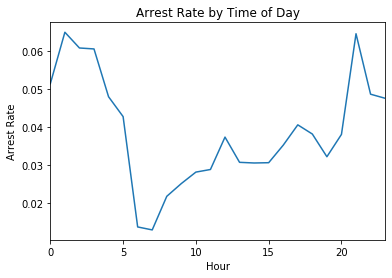

In [45]:
# line plot of 'hourly_arerst_rate'
hourly_arrest_rate.plot()
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
plt.show()

We can see that stopped drivers are normally arrested at night.

### Are drug-related stops on the rise?

In [53]:
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()
annual_search_rate = ri.search_conducted.resample('A').mean()

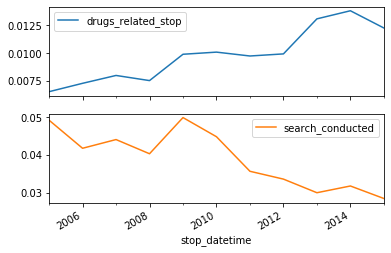

In [54]:
# concatenate 'anual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# plot 'annual'
annual.plot(subplots=True)
plt.show()

We can see that drug-related stops increased significantly between 2005 and 2015. And the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

### What violations are caught in each district?

The state of Rhode Island is broken into six police districts (zones). How do the zones compare in terms of what violations are caught by police?

In [56]:
# frequency table of districts and violations
all_zones = pd.crosstab(ri.district, ri.violation)

In [57]:
all_zones

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795

In [59]:
# select rows 'Zone K1' to 'Zone K3'
k_zones = all_zones.loc['Zone K1':'Zone K3']

In [67]:
k_zones

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322

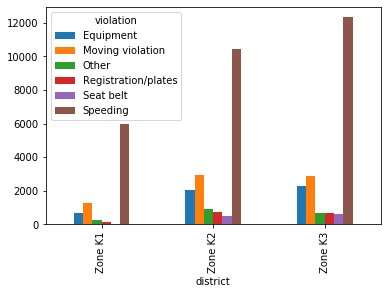

In [61]:
# plot bar chart k_zones
k_zones.plot(kind='bar')
plt.show()

### How long does a driver stopped for a violation?

In [65]:
#check 'stop_duration' column
print(ri.stop_duration.unique())

['0-15 Min' '16-30 Min' '30+ Min']


In [64]:
# maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

ri['stop_minutes'] = ri.stop_duration.map(mapping)
print(ri.stop_minutes.unique())

[ 8 23 45]


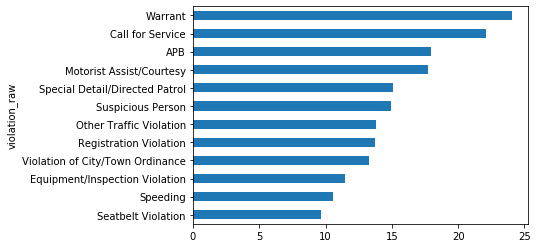

In [70]:
# the mean 'stop_minutes' for each value in 'violation_raw'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')
plt.show()

# 4. Analyzing the effect of weather on policing
 
We will explore the impact of weather conditions on police behavior during traffic stops.

### Explore the weather dataset

In [71]:
# Read 'weather.csv' into a DataFrame
weather = pd.read_csv('/Users/ledat/Desktop/weather.csv')

In [72]:
weather.head()

STATION        DATE  TAVG  TMIN  TMAX  AWND  WSF2  WT01  WT02  WT03  \
0  USW00014765  2005-01-01  44.0    35    53  8.95  25.1   1.0   NaN   NaN   
1  USW00014765  2005-01-02  36.0    28    44  9.40  14.1   NaN   NaN   NaN   
2  USW00014765  2005-01-03  49.0    44    53  6.93  17.0   1.0   NaN   NaN   
3  USW00014765  2005-01-04  42.0    39    45  6.93  16.1   1.0   NaN   NaN   
4  USW00014765  2005-01-05  36.0    28    43  7.83  17.0   1.0   NaN   NaN   

   ...  WT11  WT13  WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22  
0  ...   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  ...   NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN  
2  ...   NaN   1.0   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
3  ...   NaN   1.0   1.0   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
4  ...   NaN   1.0   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN  

[5 rows x 27 columns]

In [74]:
# describe the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].describe()

TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000

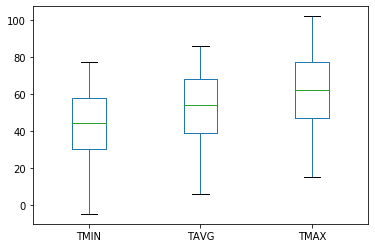

In [75]:
# box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')
plt.show()

In [77]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


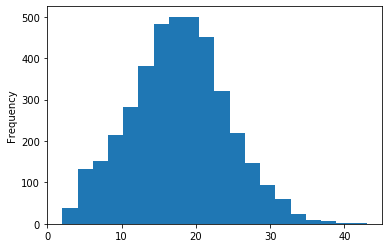

In [78]:
# visualize 'TDIFF' with a histogram with 20 bins
weather.TDIFF.plot(kind='hist', bins=20)
plt.show()

### Categorize the weather

The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example:

* WT05 indicates "Hail"
* WT11 indicates "High or damaging winds"
* WT17 indicates "Freezing rain"

For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).

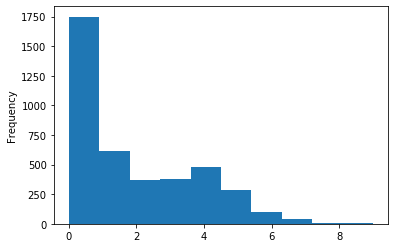

In [79]:
# copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

# calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# visualize 'bad_conditions' with a histogram
weather.bad_conditions.plot(kind='hist')
plt.show()

The counts range from 0 to 9, and should be converted to ratings as follows:

* Convert 0 to 'good'
* Convert 1 through 4 to 'bad'
* Convert 5 through 9 to 'worse'

In [88]:
# count the unique values in 'bad_conditions' and sort the index
weather.bad_conditions.value_counts().sort_index()

# create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# count the unique values in 'rating'
print(weather.rating.value_counts())

bad      1836
good     1749
worse     432
Name: rating, dtype: int64


In [94]:
from pandas.api.types import CategoricalDtype

# create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# change the data type of 'rating' to category
weather['rating'] = weather.rating.astype(CategoricalDtype(categories=cats))

# examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good, bad, worse]


### Merging datasets

In [95]:
# reset the index of 'ri'
ri.reset_index(inplace=True)

# examine the head of 'ri'
print(ri.head())

        stop_datetime   stop_date stop_time driver_gender driver_race  \
0 2005-01-04 12:55:00  2005-01-04     12:55             M       White   
1 2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2 2005-02-17 04:15:00  2005-02-17     04:15             M       White   
3 2005-02-20 17:15:00  2005-02-20     17:15             M       White   
4 2005-02-24 01:20:00  2005-02-24     01:20             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome  is_arrested stop_duration  drugs_related_stop district  \
0       Citation

In [96]:
# create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

# examine the head of 'weather_rating'
print(weather_rating.head())

         DATE rating
0  2005-01-01    bad
1  2005-01-02    bad
2  2005-01-03    bad
3  2005-01-04    bad
4  2005-01-05    bad


In [97]:
# examine the shape of 'ri'
print(ri.shape)

# merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

(86536, 16)


In [98]:
# examine the shape of 'ri_weather'
print(ri_weather.shape)

# set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(86536, 18)


### Does weather affect the arrest rate?

Do police officers arrest drivers more often when the weather is bad?

* First, we'll calculate the overall arrest rate.
* Then, we'll calculate the arrest rate for each of the weather ratings you previously assigned.
* Finally, we'll add violation type as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since we previously defined a logical order for the weather categories, good < bad < worse, they will be sorted that way in the results.


In [99]:
# calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

0.0355690117407784


In [100]:
# calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64


In [101]:
# calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation', 'rating']).is_arrested.mean())

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


The output of a single .groupby() operation on multiple columns is a Series with a MultiIndex. Working with this type of object is similar to working with a DataFrame:

* The outer index level is like the DataFrame rows.
* The inner index level is like the DataFrame columns.

We'll access data from a multi-indexed Series using the .loc[] accessor.

In [102]:
# save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# print the 'arrest_rate' Series
print(arrest_rate)

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


In [103]:
# print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])

0.05804964058049641


In [104]:
# print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


In [105]:
# unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886


In [106]:
# create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886
